# Rice Classification by using CNN

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pathlib
import os

In [2]:
tf.random.set_seed(42)

In [3]:
tf

<module 'tensorflow' from 'C:\\Users\\Ak7shy\\anaconda3\\lib\\site-packages\\tensorflow\\__init__.py'>

In [6]:
train_data = keras.utils.image_dataset_from_directory('D:/Rice Classification',
                                                 validation_split = 0.2,
                                                        subset = 'training',
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 32,
                                                       image_size=(256,256))

Found 75000 files belonging to 5 classes.
Using 60000 files for training.


In [7]:
test_data = keras.utils.image_dataset_from_directory('D:/Rice Classification',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 32,
                                                    image_size=(256,256))

Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [8]:
filenames = pathlib.Path('D:\Project dataset/Rice_Image_Dataset')
for label in train_data.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')

Arborio : 0
Basmati : 0
Ipsala : 0
Jasmine : 0
Karacadag : 0


In [9]:
train_data.cardinality().numpy(),test_data.cardinality().numpy() 
# The equation is: 60000/40 = cardinality, so it depends on your batch size.

(1875, 469)

In [10]:
train_set = train_data.take(1500)
val_set = train_data.skip(1500)   #train dataset now has first 1200 elements and the rest goes for val_set

In [11]:
train_set.cardinality().numpy(), val_set.cardinality().numpy()

(1500, 375)

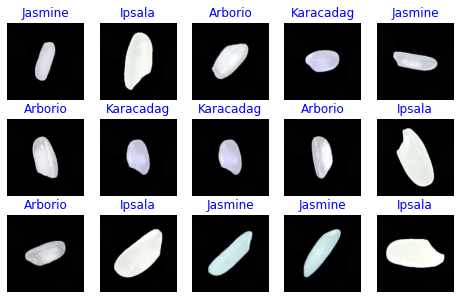

In [12]:
# print random images from the train set
plt.figure(figsize = (8, 5))
for images, labels in train_set.take(1):
    for i in range(15):
        index = random.randint(0, len(images))
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[index].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[index]], color= 'blue', fontsize= 12)
        plt.axis(False)
plt.show()

# Model Building

In [13]:
for images_batch, labels_batch in train_set:
    print(images_batch.shape)
    print(labels_batch.shape)
    break
 # Model with 5 epochs   

(32, 256, 256, 3)
(32,)


In [14]:
from tensorflow.keras import layers

In [15]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 32
                  , kernel_size = 3, activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(5, activation = 'sigmoid')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(train_set, epochs = 5, validation_data = val_set)

  
         

Epoch 1/5
1500/1500 [==============================] - 3480s 2s/step - loss: 0.2533 - accuracy: 0.9580 - val_loss: 0.0652 - val_accuracy: 0.9769
Epoch 2/5
1500/1500 [==============================] - 3062s 2s/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 3/5
1500/1500 [==============================] - 3058s 2s/step - loss: 0.0389 - accuracy: 0.9868 - val_loss: 0.0888 - val_accuracy: 0.9724
Epoch 4/5
1500/1500 [==============================] - 3067s 2s/step - loss: 0.0254 - accuracy: 0.9913 - val_loss: 0.0403 - val_accuracy: 0.9891
Epoch 5/5
1500/1500 [==============================] - 3052s 2s/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.0598 - val_accuracy: 0.9839


In [16]:
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 500)               258064500 
                                                                 
 dense_1 (Dense)             (None, 5)                 2505      
                                                        

In [17]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()  
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

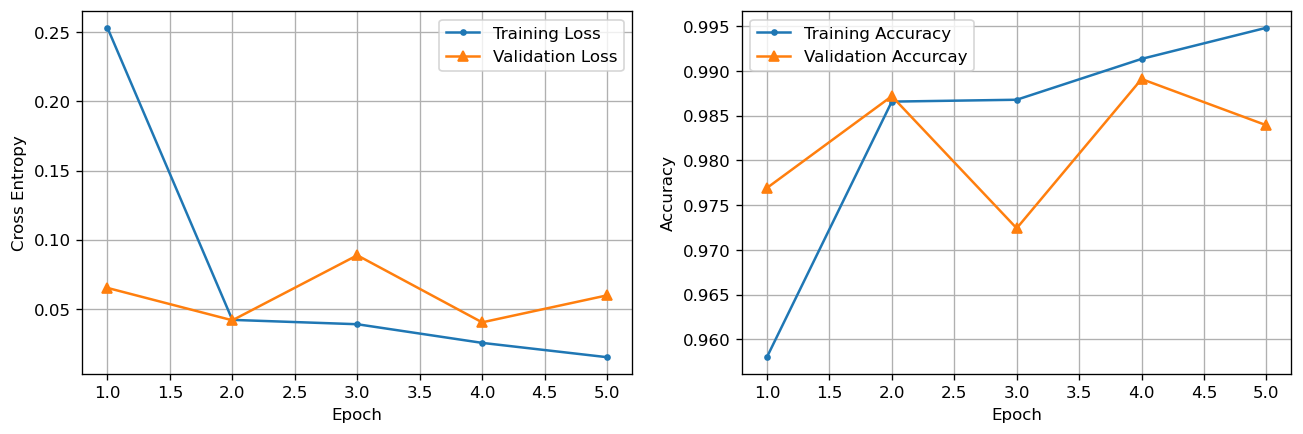

In [18]:
plot_training_curves(pd.DataFrame(history_1.history))

In [19]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)
        
X_test.shape, y_test.shape

(TensorShape([3200, 256, 256, 3]), TensorShape([3200]))

In [20]:
from sklearn import metrics
y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

100/100 [==============================] - 19s 185ms/step


In [21]:
metrics.accuracy_score(y_test, y_pred)

0.9840625

In [22]:
train_score = cnn_1.evaluate(train_data, verbose= 1)
test_score = cnn_1.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

469/469 [==============================] - 90s 192ms/step - loss: 0.0537 - accuracy: 0.9852
Train Loss:  0.017322709783911705
Train Accuracy:  0.9950500130653381
*****************************
Test Loss:  0.0536922924220562
Test Accuracy:  0.9851999878883362


In [23]:
from sklearn.metrics import classification_report
target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Arborio       0.98      0.96      0.97       603
     Basmati       0.99      0.99      0.99       611
      Ipsala       1.00      1.00      1.00       642
     Jasmine       0.98      0.98      0.98       656
   Karacadag       0.97      0.99      0.98       688

    accuracy                           0.98      3200
   macro avg       0.98      0.98      0.98      3200
weighted avg       0.98      0.98      0.98      3200



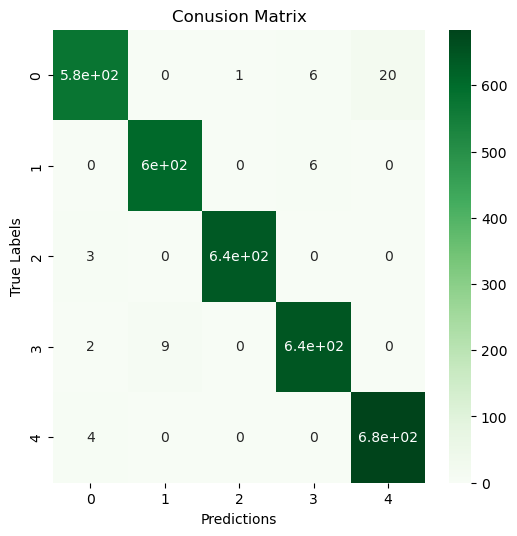

In [24]:
import seaborn as sns
plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [25]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
        c = 'g' if y_pred == y_true else 'r'
      
        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

1/1 [==============================] - 0s 186ms/step


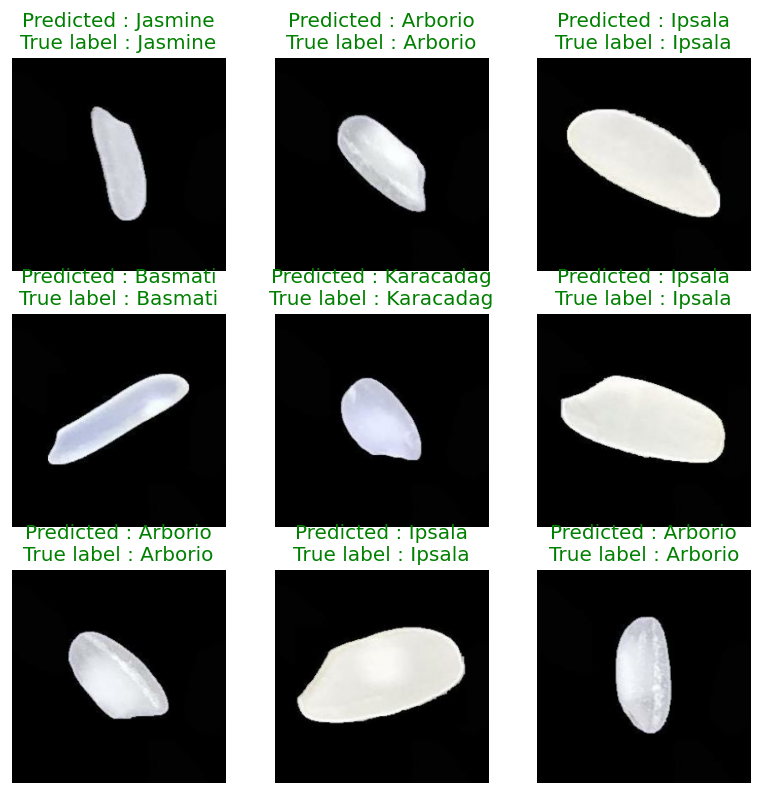

In [26]:
plot_random_predictions(test_data, cnn_1)

In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown
in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset.
Models were created by using the Convolutional Neural Network (CNN) algorithm for the image dataset,
and classification processes were performed. Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99% for CNN.

Max Pooling
It makes down-sampling or sub-sampling (Reduces the number of parameters)
It makes the detection of features invariant to scale or orientation changes.
It reduce the amount of parameters and computation in the network, and hence to also control overfitting.

CNN stands for Convolutional Neural Network. It is a deep learning algorithm that is commonly used for analyzing visual data, such as images or videos. CNNs are specifically designed to process data with a grid-like structure, where the input is typically represented as a 2D matrix. The main idea behind CNNs is to apply a series of filters, known as convolutional layers, to the input data. These filters are designed to detect various features or patterns within the data, such as edges, corners, or textures. By stacking multiple convolutional layers, the network can learn increasingly complex features. The convolutional layers are typically followed by pooling layers, which reduce the spatial dimensions of the data and help extract the most salient information. Pooling layers aggregate the output of nearby neurons and downsample the data, reducing its dimensionality while preserving important features.